In [1]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Apriori2 dataset.csv to Apriori2 dataset.csv


In [4]:
dataset = pd.read_csv('Apriori2 dataset.csv')
dataset.head()

,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,Item 10,Item 11,Item 12,Item 13,Item 14,Item 15,Item 16,Item 17,Item 18,Item 19,Item 20,Item 21,Item 22,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,4,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
print(dataset)

      Item(s)               Item 1               Item 2  ... Item 30 Item 31 Item 32
0           4         citrus fruit  semi-finished bread  ...     NaN     NaN     NaN
1           3       tropical fruit               yogurt  ...     NaN     NaN     NaN
2           1           whole milk                  NaN  ...     NaN     NaN     NaN
3           4            pip fruit               yogurt  ...     NaN     NaN     NaN
4           4     other vegetables           whole milk  ...     NaN     NaN     NaN
...       ...                  ...                  ...  ...     ...     ...     ...
9830       17              sausage              chicken  ...     NaN     NaN     NaN
9831        1    cooking chocolate                  NaN  ...     NaN     NaN     NaN
9832       10              chicken         citrus fruit  ...     NaN     NaN     NaN
9833        4  semi-finished bread        bottled water  ...     NaN     NaN     NaN
9834        5              chicken       tropical fruit  ...     

In [6]:
print(dataset.shape)

(9835, 33)


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9835 entries, 0 to 9834
Data columns (total 33 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Item(s)  9835 non-null   int64 
 1   Item 1   9835 non-null   object
 2   Item 2   7676 non-null   object
 3   Item 3   6033 non-null   object
 4   Item 4   4734 non-null   object
 5   Item 5   3729 non-null   object
 6   Item 6   2874 non-null   object
 7   Item 7   2229 non-null   object
 8   Item 8   1684 non-null   object
 9   Item 9   1246 non-null   object
 10  Item 10  896 non-null    object
 11  Item 11  650 non-null    object
 12  Item 12  468 non-null    object
 13  Item 13  351 non-null    object
 14  Item 14  273 non-null    object
 15  Item 15  196 non-null    object
 16  Item 16  141 non-null    object
 17  Item 17  95 non-null     object
 18  Item 18  66 non-null     object
 19  Item 19  52 non-null     object
 20  Item 20  38 non-null     object
 21  Item 21  29 non-null     object
 22  

In [8]:
types = dataset.dtypes
print(types)

Item(s)     int64
Item 1     object
Item 2     object
Item 3     object
Item 4     object
Item 5     object
Item 6     object
Item 7     object
Item 8     object
Item 9     object
Item 10    object
Item 11    object
Item 12    object
Item 13    object
Item 14    object
Item 15    object
Item 16    object
Item 17    object
Item 18    object
Item 19    object
Item 20    object
Item 21    object
Item 22    object
Item 23    object
Item 24    object
Item 25    object
Item 26    object
Item 27    object
Item 28    object
Item 29    object
Item 30    object
Item 31    object
Item 32    object
dtype: object


In [15]:
items = (dataset['Item(s)'].unique())
items

array([ 4,  3,  1,  5,  2,  9, 11,  6,  7,  8, 13, 10, 15, 23, 12, 16, 14,
       17, 19, 20, 18, 21, 26, 32, 22, 29, 27, 28, 24])

In [17]:
it = (dataset['Item 1'].unique())
it

array(['citrus fruit', 'tropical fruit', 'whole milk', 'pip fruit',
       'other vegetables', 'rolls/buns', 'potted plants', 'beef',
       'frankfurter', 'chicken', 'butter', 'fruit/vegetable juice',
       'packaged fruit/vegetables', 'chocolate', 'specialty bar',
       'butter milk', 'bottled water', 'yogurt', 'sausage', 'brown bread',
       'hamburger meat', 'root vegetables', 'pork', 'pastry',
       'canned beer', 'berries', 'coffee', 'misc. beverages', 'ham',
       'turkey', 'curd cheese', 'red/blush wine',
       'frozen potato products', 'flour', 'sugar', 'frozen meals',
       'herbs', 'soda', 'detergent', 'grapes', 'processed cheese', 'fish',
       'sparkling wine', 'newspapers', 'curd', 'pasta', 'popcorn',
       'finished products', 'beverages', 'bottled beer', 'dessert',
       'dog food', 'specialty chocolate', 'condensed milk', 'cleaner',
       'white wine', 'meat', 'ice cream', 'hard cheese', 'cream cheese',
       'liquor', 'pickled vegetables', 'liquor (appetiz

In [18]:
dataset.isnull().sum()

Item(s)       0
Item 1        0
Item 2     2159
Item 3     3802
Item 4     5101
Item 5     6106
Item 6     6961
Item 7     7606
Item 8     8151
Item 9     8589
Item 10    8939
Item 11    9185
Item 12    9367
Item 13    9484
Item 14    9562
Item 15    9639
Item 16    9694
Item 17    9740
Item 18    9769
Item 19    9783
Item 20    9797
Item 21    9806
Item 22    9817
Item 23    9821
Item 24    9827
Item 25    9828
Item 26    9828
Item 27    9829
Item 28    9830
Item 29    9831
Item 30    9834
Item 31    9834
Item 32    9834
dtype: int64

In [19]:
transactions = []
for i in range(0, 9835):
    transactions.append([str(dataset.values[i,j]) for j in range(0, 33)])
transactions

[['4',
  'citrus fruit',
  'semi-finished bread',
  'margarine',
  'ready soups',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['3',
  'tropical fruit',
  'yogurt',
  'coffee',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['1',
  'whole milk',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['4',
  'pip fruit',
  'yogurt',
  'cream cheese

In [20]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)


In [21]:
te_ary

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False],
       [ True, False, False, ...,  True, False, False],
       ...,
       [False,  True, False, ..., False,  True, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [22]:
df = pd.DataFrame(te_ary, columns=te.columns_)
print(df)

          1     10     11     12  ...  white wine  whole milk  yogurt  zwieback
0     False  False  False  False  ...       False       False   False     False
1     False  False  False  False  ...       False       False    True     False
2      True  False  False  False  ...       False        True   False     False
3     False  False  False  False  ...       False       False    True     False
4     False  False  False  False  ...       False        True   False     False
...     ...    ...    ...    ...  ...         ...         ...     ...       ...
9830  False  False  False  False  ...       False        True   False     False
9831   True  False  False  False  ...       False       False   False     False
9832  False   True  False  False  ...       False       False    True     False
9833  False  False  False  False  ...       False       False   False     False
9834  False  False  False  False  ...       False       False   False     False

[9835 rows x 199 columns]


In [40]:
df=df.drop(['nan'], axis = 1)

In [41]:
print(df)

          1     10     11     12  ...  white wine  whole milk  yogurt  zwieback
0     False  False  False  False  ...       False       False   False     False
1     False  False  False  False  ...       False       False    True     False
2      True  False  False  False  ...       False        True   False     False
3     False  False  False  False  ...       False       False    True     False
4     False  False  False  False  ...       False        True   False     False
...     ...    ...    ...    ...  ...         ...         ...     ...       ...
9830  False  False  False  False  ...       False        True   False     False
9831   True  False  False  False  ...       False       False   False     False
9832  False   True  False  False  ...       False       False    True     False
9833  False  False  False  False  ...       False       False   False     False
9834  False  False  False  False  ...       False       False   False     False

[9835 rows x 198 columns]


In [84]:
freq_items = apriori(df, min_support=0.5, use_colnames=True)
freq_items

,support,itemsets
0,0.219522,(1)
1,0.167056,(2)
2,0.132079,(3)
3,0.102186,(4)
4,0.110524,(bottled water)
5,0.193493,(other vegetables)
6,0.183935,(rolls/buns)
7,0.108998,(root vegetables)
8,0.174377,(soda)
9,0.104931,(tropical fruit)


In [61]:
rules = association_rules(freq_items, metric="confidence", min_threshold=0.5)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [62]:
list(rules)

['antecedents',
 'consequents',
 'antecedent support',
 'consequent support',
 'support',
 'confidence',
 'lift',
 'leverage',
 'conviction']

In [63]:
print(len(rules))

0


In [64]:
freq_items['length'] = freq_items['itemsets'].apply(lambda x: len(x))
freq_items

,support,itemsets,length
0,0.219522,(1),1
1,0.167056,(2),1
2,0.132079,(3),1
3,0.102186,(4),1
4,0.110524,(bottled water),1
5,0.193493,(other vegetables),1
6,0.183935,(rolls/buns),1
7,0.108998,(root vegetables),1
8,0.174377,(soda),1
9,0.104931,(tropical fruit),1


In [69]:
freq_items[(freq_items['support'] >= 0.5)]

,support,itemsets,length


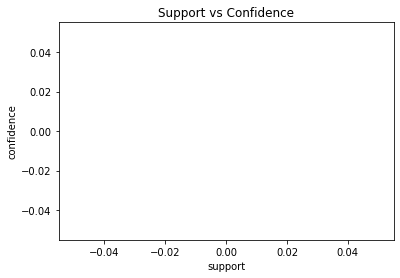

In [70]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

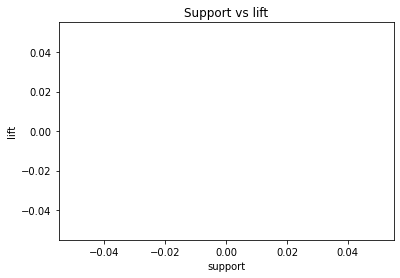

In [71]:
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs lift')
plt.show()

In [74]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [75]:
import pickle 
print("[INFO] Saving model...")
# Save the trained model as a pickle string. 
saved_model=pickle.dump(freq_items,open('/content/drive/My Drive/ML/aprioriexample.pkl', 'wb'))

[INFO] Saving model...


In [76]:
model = pickle.load(open('/content/drive/My Drive/ML/aprioriexample.pkl','rb')) 

In [77]:
!pip install streamlit

     |████████████████████████████████| 7.8MB 26.9MB/s 
     |████████████████████████████████| 174kB 57.0MB/s 
     |████████████████████████████████| 4.2MB 42.8MB/s 
     |████████████████████████████████| 112kB 47.3MB/s 
     |████████████████████████████████| 81kB 10.0MB/s 
     |████████████████████████████████| 71kB 9.6MB/s 
     |████████████████████████████████| 122kB 44.6MB/s 
     |████████████████████████████████| 788kB 41.2MB/s 
     |████████████████████████████████| 368kB 33.0MB/s 
  Created wheel for blinker: filename=blinker-1.4-cp37-none-any.whl size=13476 sha256=90502b80ae34b85c6589d50dd15ceb260b841f98b334f0f83cfb6a2087cc58a6
  Stored in directory: /root/.cache/pip/wheels/92/a0/00/8690a57883956a301d91cf4ec999cc0b258b01e3f548f86e89
Successfully built blinker
ERROR: jupyter-console 5.2.0 has requirement prompt-toolkit<2.0.0,>=1.0.0, but you'll have prompt-toolkit 3.0.19 which is incompatible.
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipy

In [78]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:
!pip install pyngrok

     |████████████████████████████████| 747kB 25.7MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.0.5-cp37-none-any.whl size=19262 sha256=c4f77e3a0b16ff74f22a14f6840c2ab8239bb3bccd4beaaab9b4c4aa23344923
  Stored in directory: /root/.cache/pip/wheels/0c/13/64/5ebbcc22eaf53fdf5766b397c1fb17c83f5775fdccf0ea1b88
Successfully built pyngrok


In [80]:
!ngrok authtoken 1oEm0wopEJyjrT38ULluwUKK5fq_7ai4ZocZJ2YuFuoiJfoMh

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [103]:
%%writefile app.py
import streamlit as st 
from PIL import Image
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
st.set_option('deprecation.showfileUploaderEncoding', False)
def find_associatio_rule(support):
  # Load the pickled model
  model = pickle.load(open('/content/drive/My Drive/ML/aprioriexample.pkl','rb'))     
  if uploaded_file is not None:
    dataset= pd.read_csv(uploaded_file)
  else:
    dataset= pd.read_csv('/content/drive/My Drive/ML/dataset.csv')

  #Create list 
  transactions = []
  for i in range(0, 315):
    transactions.append([str(dataset.values[i,j]) for j in range(0, 7)])

  from mlxtend.preprocessing import TransactionEncoder
  te = TransactionEncoder()
  te_ary = te.fit(transactions).transform(transactions)
  df = pd.DataFrame(te_ary, columns=te.columns_)
  freq_items = apriori(df, min_support=support, use_colnames=True)
  rules = association_rules(freq_items, metric="confidence", min_threshold=0.6)
  return rules
def find_frequent_items(support):
  # Load the pickled model
  model = pickle.load(open('/content/drive/My Drive/ML/aprioriexample.pkl','rb'))     
  if uploaded_file is not None:
    dataset= pd.read_csv(uploaded_file)
  else:
    dataset= pd.read_csv('/content/drive/My Drive/ML/dataset.csv')
  #Create list 
  transactions = []
  for i in range(0, 315):
    transactions.append([str(dataset.values[i,j]) for j in range(0, 7)])

  from mlxtend.preprocessing import TransactionEncoder
  te = TransactionEncoder()
  te_ary = te.fit(transactions).transform(transactions)
  df = pd.DataFrame(te_ary, columns=te.columns_)
  freq_items = apriori(df, min_support=support, use_colnames=True)
  rules = association_rules(freq_items, metric="confidence", min_threshold=0.6)
  
  return freq_items
html_temp = """
   <div class="" style="background-color:blue;" >
   <div class="clearfix">           
   <div class="col-md-12">
   <center><p style="font-size:40px;color:white;margin-top:10px;">Poornima Institute of Engineering & Technology</p></center> 
   <center><p style="font-size:30px;color:white;margin-top:10px;">Department of Computer Engineering</p></center> 
   <center><p style="font-size:25px;color:white;margin-top:10px;"Machine Learning Lab Experiment</p></center> 
   </div>
   </div>
   </div>
   """
st.markdown(html_temp,unsafe_allow_html=True)
st.header("Identification of items Purchased together ")
  
uploaded_file = st.file_uploader("Upload dataset", help='Please upload Apriori2 dataset.csv otherwise leave  blank') 
support = st.number_input('Insert a minimum suppport to find association rule ',0,1)

  
if st.button("Association Rule"):
  rules=find_associatio_rule(support)
  st.success('Apriori has found Following rules {}'.format(rules))
if st.button("Frequent Items"):
  frequent_items=find_frequent_items(support)
  st.success('Apriori has found Frequent itemsets {}'.format(frequent_items))      
if st.button("About"):
  st.subheader("Developed by Mudit Singhal")
  st.subheader("PGI18CS026")
html_temp = """
   <div class="" style="background-color:orange;" >
   <div class="clearfix">           
   <div class="col-md-12">
   <center><p style="font-size:20px;color:white;margin-top:10px;">Machine learning Experiment No. 9</p></center> 
   </div>
   </div>
   </div>
   """
st.markdown(html_temp,unsafe_allow_html=True)

Overwriting app.py


In [104]:
!nohup streamlit run  app.py &

nohup: appending output to 'nohup.out'


In [105]:
from pyngrok import ngrok
url=ngrok.connect(port='8050')
url

<NgrokTunnel: "http://f83a585aff42.ngrok.io" -> "http://localhost:80">

In [106]:
!streamlit run --server.port 80 app.py


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:80
  External URL: http://35.245.88.68:80

2021-07-06 10:19:13.296 Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/streamlit/script_runner.py", line 349, in _run_script
    exec(code, module.__dict__)
  File "/content/app.py", line 68, in <module>
    rules=find_associatio_rule(support)
  File "/content/app.py", line 15, in find_associatio_rule
    dataset= pd.read_csv('/content/drive/My Drive/ML/dataset.csv')
  File "/usr/local/lib/python3.7/dist-packages/pandas/io/parsers.py", line 688, in read_csv
    return _read(filepath_or_buffer, kwds)
  File "/usr/local/lib/python3.7/dist-packages/pandas/io/parsers.py", line 454, in _read
    parser = TextFileReader(fp_or_buf, **kwds)
  File "/usr/local/lib/python3.7/dist-packages/pandas/io/parsers.py", line 948, in __init__
    self._make_engine(self.engine)
  File "/usr/local/lib/python3.7/dist-packages/pandas/io/parsers